# **Titanic Survival Prediction**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

In [3]:
# loading dataset
df = pd.read_csv("tested.csv")

In [4]:
# first 5 entries
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df.shape

(418, 12)

In [6]:
# total columns in dataset
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# overall necessary informtion of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [8]:
df.nunique()   #finding number of unique values
# Note:   (It is not perfect)
# If the number of unique values is more than 10, then it is more possible that its dtype is int/float
# If the number of unique values is less than 10, then it is more possible that its dtype is Catagorical/Object

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [9]:
# finding percentage null values
df.isnull().sum() / len(df) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

<Axes: >

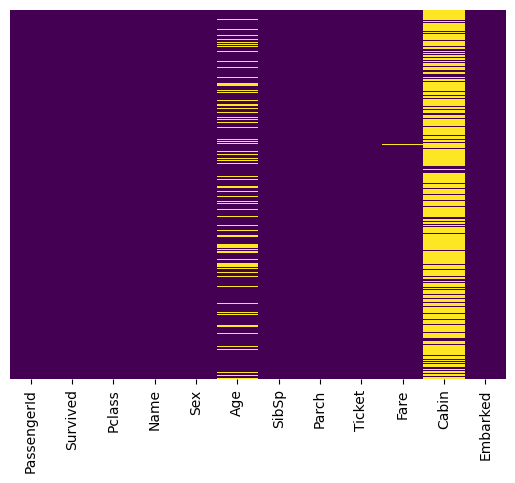

In [10]:
#visualize the nan values in heatmap
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [11]:
# remove/drop 'deck' column
df.drop(columns=['Cabin'], inplace=True)

In [12]:
# filling nan values 'Fare' column by its median
df.Fare.fillna(df['Fare'].median(), inplace=True)

### **Predictive Imputation:**
For handling missing age values, use a predictive model (e.g. regression model) to predict missing 'Age' values based on other available features. This approach may provide more accurate imputations.
- First, we predict the missing 'Age' values by selecting relevant features for age prediction
- Then, We fill thses predicted values in 'Age' columns
### This step will impute values `more accurately`

In [13]:
from sklearn.linear_model import LinearRegression

# Split the data into two sets: one with missing 'Age' values and one without
data_missing_age = df[df['Age'].isnull()]
data_not_missing_age = df[~df['Age'].isnull()]

# Select relevant features for age prediction
age_features = ['Pclass', 'Fare', 'SibSp', 'Parch']

# Impute missing values in the 'Fare' column with its mean
mean_fare = df['Fare'].mean()
data_missing_age['Fare'].fillna(mean_fare, inplace=True)
data_not_missing_age['Fare'].fillna(mean_fare, inplace=True)

# Train a regression model to predict 'Age'
age_model = LinearRegression()
age_model.fit(data_not_missing_age[age_features], data_not_missing_age['Age'])

# Predict missing 'Age' values
predicted_age = age_model.predict(data_missing_age[age_features])

# Fill missing values with predicted values
df.loc[df['Age'].isnull(), 'Age'] = predicted_age

C:\Users\HP\AppData\Local\Temp\ipykernel_1600\2192280896.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_missing_age['Fare'].fillna(mean_fare, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1600\2192280896.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_not_missing_age['Fare'].fillna(mean_fare, inplace=True)


In [14]:
df.isnull().sum()   # null values confirmation

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
# Statistical insights
df.describe()       

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,29.323703,0.447368,0.392344,35.576535
std,120.810458,0.481622,0.841838,13.005546,0.896760,0.981429,55.850103
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,22.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,25.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,36.375000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [16]:
# Encode categorical variables
label_encoder = LabelEncoder()
df["Sex"] = label_encoder.fit_transform(df["Sex"])
df["Embarked"] = label_encoder.fit_transform(df["Embarked"])

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,2
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,1
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,2
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,2


<Axes: >

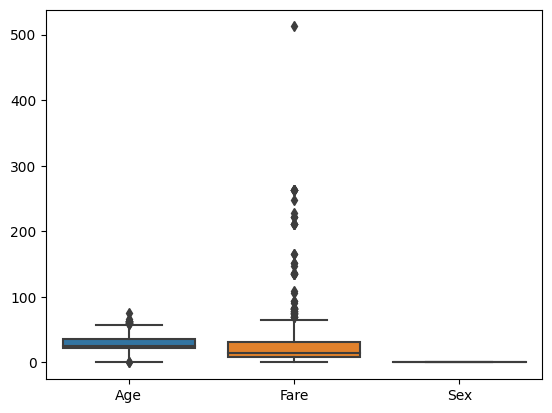

In [18]:
#  Boxplot for Checking Outliers
sns.boxplot(df[['Age', 'Fare', 'Sex']])

In [19]:
# Clip the 'Age' and 'Fare' columns to the defined bounds
df['Age'] = df['Age'].clip(lower=2, upper=55)
df['Fare'] = df['Fare'].clip(lower=0, upper=65)

<Axes: >

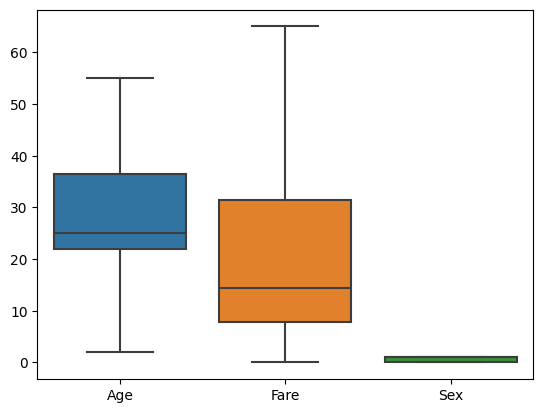

In [20]:
sns.boxplot(df[['Age', 'Fare', 'Sex']])  # Outliers are removed

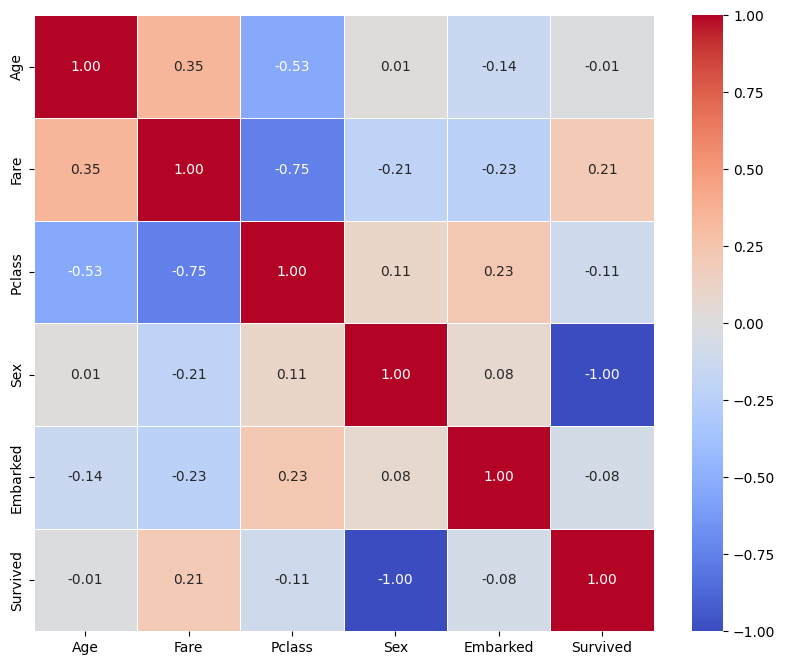

In [21]:
# Select numerical columns for correlation
numerical_columns = ["Age", "Fare", "Pclass", "Sex", "Embarked", "Survived"]
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show()

## Applying Model

In [22]:
# Select features and target variable
X = df[["Pclass", "Sex", "Age", "Fare"]]
y = df["Survived"]

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Build and train a Random Forest classifier
rfc = LogisticRegression()
rfc.fit(X_train, y_train)

LogisticRegression()

In [25]:
# Make predictions
y_pred = rfc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [26]:
# Print results
print("Accuracy: {}".format(accuracy))
print("Classification Report:\n", report)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



---

In [27]:
from sklearn.model_selection import train_test_split

# split into train test
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)


# Call the model
model=LogisticRegression()

# Train the model
model.fit(X_train,y_train)


LogisticRegression()

In [28]:
# predict the model
predictions=model.predict([[1,	1,	22, 30]])
predictions

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [29]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy", accuracy)

Accuracy 1.0
